# Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast
from sklearn.metrics import cohen_kappa_score, f1_score
import seaborn as sns

In [ ]:
sns.set_style("whitegrid")

# AA

## Human annotators

r/t - reddit/twitter

bs/fs/ir/wl - annotator initials

cc/ai - climate change/artificial intelligence


Annotator 1

In [ ]:
r_bs_cc = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Reddit_r2_a1_zgodność_climate.xlsx')
r_bs_ai = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Reddit_r2_a1_zgodność_AI.xlsx')

t_bs_cc = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Twitter_r2_a1_zgodność_climate.xlsx')
t_bs_ai = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Twitter_r2_a1_zgodność_AI.xlsx')

Annotator 2

In [ ]:
r_fs_cc = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Reddit_r2_a2_zgodność_climate.xlsx')
r_fs_ai = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Reddit_r2_a2_zgodność_AI.xlsx')

t_fs_cc = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Twitter_r2_a2_zgodność_climate.xlsx')
t_fs_ai = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Twitter_r2_a2_zgodność_AI.xlsx')

Annotator 3

In [ ]:
r_ir_cc = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Reddit_r2_a3_zgodność_climate_corrected.xlsx')
r_ir_ai = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Reddit_r2_a3_zgodność_AI.xlsx')

t_ir_cc = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Twitter_r2_a3_zgodność_climate.xlsx')
t_ir_ai = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Twitter_r2_a3_zgodność_AI.xlsx')

Annotator 4

In [ ]:
r_wl_cc = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Reddit_r2_a4_zgodność_climate.xlsx')
r_wl_ai = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Reddit_r2_a4_zgodność_AI.xlsx')

t_wl_cc = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Twitter_r2_a4_zgodność_climate.xlsx')
t_wl_ai = pd.read_excel('/content/drive/MyDrive/MA thesis/2nd round/Twitter_r2_a4_zgodność_AI.xlsx')

## Merging human and GPT annotation

In [ ]:
result_bs = result_bs.rename(columns={
    'affect_h': 'affect_h_bs',
    'availability_h': 'availability_h_bs',
    'representativeness_h': 'representativeness_h_bs',
    'confirmation_b': 'confirmation_b_bs',
    'all_or_nothing': 'all_or_nothing_bs'
})

In [ ]:
result_bs[['affect_h_fs', 'availability_h_fs', 'representativeness_h_fs',
        'confirmation_b_fs', 'all_or_nothing_fs']] = result_fs[['affect_h', 'availability_h', 'representativeness_h',
                                                                  'confirmation_b', 'all_or_nothing']]

result_bs[['affect_h_ir', 'availability_h_ir', 'representativeness_h_ir',
        'confirmation_b_ir', 'all_or_nothing_ir']] = result_ir[['affect_h', 'availability_h', 'representativeness_h',
                                                                 'confirmation_b', 'all_or_nothing']]

result_bs[['affect_h_wl', 'availability_h_wl', 'representativeness_h_wl',
        'confirmation_b_wl', 'all_or_nothing_wl']] = result_wl[['affect_h', 'availability_h', 'representativeness_h',
                                                                 'confirmation_b', 'all_or_nothing']]

In [ ]:
result_bs.head()

In [ ]:
gpt_df = pd.read_excel("/content/drive/MyDrive/MA thesis/Open AI automatic annotation/Pliki po anotacji/merged_annotated_gpt.xlsx")

## GPT as 5th annotator

### Merged file

In [ ]:
human_merged = pd.read_excel("/content/drive/MyDrive/MA thesis/2nd round/final_merged_annotations_with_id.xlsx")
gpt_df = pd.read_excel("/content/drive/MyDrive/MA thesis/Open AI automatic annotation/Pliki po anotacji/merged_annotated_gpt.xlsx")

In [ ]:
gpt_df.rename(columns={
    'affect_h': 'affect_h_gpt',
    'availability_h': 'availability_h_gpt',
    'representativeness_h': 'representativeness_h_gpt',
    'confirmation_b': 'confirmation_b_gpt',
    'all_or_nothing': 'all_or_nothing_gpt'
}, inplace=True)

In [ ]:
result_bs = pd.concat([r_bs_cc, r_bs_ai, t_bs_cc, t_bs_ai], ignore_index=True)
result_fs = pd.concat([r_fs_cc, r_fs_ai, t_fs_cc, t_fs_ai], ignore_index=True)
result_ir = pd.concat([r_ir_cc, r_ir_ai, t_ir_cc, t_ir_ai], ignore_index=True)
result_wl = pd.concat([r_wl_cc, r_wl_ai, t_wl_cc, t_wl_ai], ignore_index=True)

In [ ]:
gpt_df[['affect_h_bs', 'availability_h_bs', 'representativeness_h_bs',
    'confirmation_b_bs', 'all_or_nothing_bs']] = result_bs[['affect_h', 'availability_h', 'representativeness_h',
    'confirmation_b', 'all_or_nothing']]

gpt_df[['affect_h_fs', 'availability_h_fs', 'representativeness_h_fs',
    'confirmation_b_fs', 'all_or_nothing_fs']] = result_fs[['affect_h', 'availability_h', 'representativeness_h',
    'confirmation_b', 'all_or_nothing']]

gpt_df[['affect_h_ir', 'availability_h_ir', 'representativeness_h_ir',
    'confirmation_b_ir', 'all_or_nothing_ir']] = result_ir[['affect_h', 'availability_h', 'representativeness_h',
    'confirmation_b', 'all_or_nothing']]

gpt_df[['affect_h_wl', 'availability_h_wl', 'representativeness_h_wl',
    'confirmation_b_wl', 'all_or_nothing_wl']] = result_wl[['affect_h', 'availability_h', 'representativeness_h',
    'confirmation_b', 'all_or_nothing']]

In [ ]:
gpt_df.to_excel('/content/drive/MyDrive/MA thesis/Results/merged_human_gpt.xlsx', index=False)

### Fleiss Kappa

#### Bias presence

In [ ]:
bias_presence_df = gpt_df.copy()
bias_columns = [col for col in bias_presence_df.columns if col not in ['topic']]
bias_presence_df[bias_columns] = bias_presence_df[bias_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

for col in bias_columns:
    bias_presence_df[col] = np.where(bias_presence_df[col] > 0, 1, 0)

bias_counts = bias_presence_df[bias_columns].apply(lambda row: np.bincount(row, minlength=2), axis=1)
bias_counts_df = pd.DataFrame(bias_counts.tolist(), columns=['no_bias', 'bias'])

kappa = fleiss_kappa(bias_counts_df.values, method='fleiss')
print(f"Fleiss' Kappa for bias/no bias agreement: {kappa:.4f}")

Fleiss' Kappa for bias/no bias agreement: -0.0106


#### Each bias

In [ ]:
fleiss_kappa_results = {}

for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']:
    annotator_columns = [f"{bias}_{annotator}" for annotator in ['gpt', 'bs', 'fs', 'ir', 'wl'] if f"{bias}_{annotator}" in bias_presence_df.columns]

    bias_counts = bias_presence_df[annotator_columns].apply(lambda row: np.bincount(row, minlength=2), axis=1)
    bias_counts_df = pd.DataFrame(bias_counts.tolist(), columns=['no_bias', 'bias'])

    kappa = fleiss_kappa(bias_counts_df.values, method='fleiss')
    fleiss_kappa_results[bias] = kappa
    print(f"Fleiss' Kappa for {bias}: {kappa:.4f}")

Fleiss' Kappa for affect_h: 0.0736
Fleiss' Kappa for availability_h: 0.0813
Fleiss' Kappa for representativeness_h: 0.0189
Fleiss' Kappa for confirmation_b: 0.0610
Fleiss' Kappa for all_or_nothing: -0.0361


### Cohen's Kappa

#### Bias presence

In [ ]:
annotators = ['gpt', 'bs', 'fs', 'ir', 'wl']
kappa_results_bias_no_bias = {}

annotator_pairs = list(itertools.combinations(annotators, 2))
for annotator1, annotator2 in annotator_pairs:
    col1 = [f"{bias}_{annotator1}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']]
    col2 = [f"{bias}_{annotator2}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']]

    combined_col1 = bias_presence_df[col1].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
    combined_col2 = bias_presence_df[col2].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

    kappa = cohen_kappa_score(combined_col1, combined_col2)
    kappa_results_bias_no_bias[(annotator1, annotator2)] = kappa
    print(f"Cohen's Kappa for Bias/No Bias between {annotator1} and {annotator2}: {kappa:.4f}")

Cohen's Kappa for Bias/No Bias between gpt and bs: 0.0236
Cohen's Kappa for Bias/No Bias between gpt and fs: 0.2027
Cohen's Kappa for Bias/No Bias between gpt and ir: 0.0757
Cohen's Kappa for Bias/No Bias between gpt and wl: 0.0222
Cohen's Kappa for Bias/No Bias between bs and fs: 0.1339
Cohen's Kappa for Bias/No Bias between bs and ir: 0.1073
Cohen's Kappa for Bias/No Bias between bs and wl: 0.1522
Cohen's Kappa for Bias/No Bias between fs and ir: 0.2215
Cohen's Kappa for Bias/No Bias between fs and wl: 0.0969
Cohen's Kappa for Bias/No Bias between ir and wl: 0.0848


#### Each bias

In [ ]:
kappa_results = {}

for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']:
    annotator_pairs = list(itertools.combinations(annotators, 2))

    kappa_scores = {}
    for annotator1, annotator2 in annotator_pairs:
        col1 = f"{bias}_{annotator1}"
        col2 = f"{bias}_{annotator2}"

        if col1 in bias_presence_df.columns and col2 in bias_presence_df.columns:
            try:
                kappa = cohen_kappa_score(bias_presence_df[col1], bias_presence_df[col2])
                if not np.isnan(kappa):
                    kappa_scores[(annotator1, annotator2)] = kappa
                    print(f"Cohen's Kappa for {bias} between {annotator1} and {annotator2}: {kappa:.4f}")
            except ValueError:
                continue

    kappa_results[bias] = kappa_scores

average_kappas = {bias: sum(scores.values()) / len(scores) for bias, scores in kappa_results.items() if scores}
print("\nAverage Cohen's Kappa for each bias category:")
for bias, avg_kappa in average_kappas.items():
    print(f"{bias}: {avg_kappa:.4f}")

Cohen's Kappa for affect_h between gpt and bs: 0.0400
Cohen's Kappa for affect_h between gpt and fs: 0.1749
Cohen's Kappa for affect_h between gpt and ir: 0.0475
Cohen's Kappa for affect_h between gpt and wl: 0.0444
Cohen's Kappa for affect_h between bs and fs: 0.0494
Cohen's Kappa for affect_h between bs and ir: 0.0804
Cohen's Kappa for affect_h between bs and wl: 0.1403
Cohen's Kappa for affect_h between fs and ir: 0.1207
Cohen's Kappa for affect_h between fs and wl: 0.0797
Cohen's Kappa for affect_h between ir and wl: 0.0554
Cohen's Kappa for availability_h between gpt and bs: 0.0308
Cohen's Kappa for availability_h between gpt and fs: 0.0856
Cohen's Kappa for availability_h between gpt and ir: 0.1313
Cohen's Kappa for availability_h between gpt and wl: 0.0552
Cohen's Kappa for availability_h between bs and fs: 0.1691
Cohen's Kappa for availability_h between bs and ir: 0.0408
Cohen's Kappa for availability_h between bs and wl: 0.0763
Cohen's Kappa for availability_h between fs and i

### Weighted F1 score

#### Bias presence

In [ ]:
f1_results_bias_no_bias = {}

annotator_pairs = list(itertools.combinations(annotators, 2))
for annotator1, annotator2 in annotator_pairs:
    col1 = [f"{bias}_{annotator1}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']]
    col2 = [f"{bias}_{annotator2}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']]

    col1 = [c for c in col1 if c in bias_presence_df.columns]
    col2 = [c for c in col2 if c in bias_presence_df.columns]

    if col1 and col2:
        combined_col1 = bias_presence_df[col1].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
        combined_col2 = bias_presence_df[col2].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

        f1 = f1_score(combined_col1, combined_col2, average='weighted')
        f1_results_bias_no_bias[(annotator1, annotator2)] = f1
        print(f"F1 Score for Bias/No Bias between {annotator1} and {annotator2}: {f1:.4f}")

F1 Score for Bias/No Bias between gpt and bs: 0.1908
F1 Score for Bias/No Bias between gpt and fs: 0.5161
F1 Score for Bias/No Bias between gpt and ir: 0.3517
F1 Score for Bias/No Bias between gpt and wl: 0.1846
F1 Score for Bias/No Bias between bs and fs: 0.8347
F1 Score for Bias/No Bias between bs and ir: 0.8893
F1 Score for Bias/No Bias between bs and wl: 0.9464
F1 Score for Bias/No Bias between fs and ir: 0.7126
F1 Score for Bias/No Bias between fs and wl: 0.6655
F1 Score for Bias/No Bias between ir and wl: 0.7969


#### Each bias

In [ ]:
f1_results_per_bias = {}
for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']:
    f1_scores = {}
    for annotator1, annotator2 in annotator_pairs:
        col1 = f"{bias}_{annotator1}"
        col2 = f"{bias}_{annotator2}"

        if col1 in bias_presence_df.columns and col2 in bias_presence_df.columns:
            f1 = f1_score(bias_presence_df[col1], bias_presence_df[col2], average='weighted')
            f1_scores[(annotator1, annotator2)] = f1
            print(f"F1 Score for {bias} between {annotator1} and {annotator2}: {f1:.4f}")

    f1_results_per_bias[bias] = f1_scores

### Gwet's AC1

#### Bias presence

In [ ]:
gwet_results_bias_no_bias = {}

bias_no_bias_cols = [
    f"{bias}_{annotator}" for bias in ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']
    for annotator in annotators if f"{bias}_{annotator}" in bias_presence_df.columns
]

if len(bias_no_bias_cols) >= 2:
    df_bias_no_bias = bias_presence_df[bias_no_bias_cols].copy()
    df_bias_no_bias.columns = [col.split('_')[-1] for col in bias_no_bias_cols]

    cac_instance = CAC(df_bias_no_bias)
    gwet_result = cac_instance.gwet()
    gwet_results_bias_no_bias['bias_no_bias'] = gwet_result

    print("Gwet's AC1 for Bias/No Bias:")
    print({
        'est': {
            'coefficient_value': gwet_result['est']['coefficient_value'],
            'coefficient_name': gwet_result['est']['coefficient_name'],
            'confidence_interval': gwet_result['est']['confidence_interval'],
            'p_value': gwet_result['est']['p_value'],
            'z': gwet_result['est']['z'],
            'se': gwet_result['est']['se'],
            'pa': gwet_result['est']['pa'],
            'pe': gwet_result['est']['pe']
        },
        'weights': gwet_result['weights'],
        'categories': gwet_result['categories']
    })

Gwet's AC1 for Bias/No Bias:
{'est': {'coefficient_value': 0.89103, 'coefficient_name': 'AC1', 'confidence_interval': (0.88736, 0.89469), 'p_value': 0.0, 'z': 476.77712, 'se': 0.00187, 'pa': 0.90179, 'pe': 0.09877}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}


#### For each bias

In [ ]:
annotators = ['gpt', 'bs', 'fs', 'ir', 'wl']
biases = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']

gwet_results = {}

for bias in biases:
    annotator_cols = [f"{bias}_{annotator}" for annotator in annotators if f"{bias}_{annotator}" in bias_presence_df.columns]

    if len(annotator_cols) >= 2:
        df_bias = bias_presence_df[annotator_cols].copy()
        df_bias.columns = [col.split('_')[-1] for col in annotator_cols]

        cac_instance = CAC(df_bias)
        gwet_result = cac_instance.gwet()
        gwet_results[bias] = gwet_result

        print(f"Gwet's AC1 for {bias}:")
        print({
            'est': {
                'coefficient_value': gwet_result['est']['coefficient_value'],
                'coefficient_name': gwet_result['est']['coefficient_name'],
                'confidence_interval': gwet_result['est']['confidence_interval'],
                'p_value': gwet_result['est']['p_value'],
                'z': gwet_result['est']['z'],
                'se': gwet_result['est']['se'],
                'pa': gwet_result['est']['pa'],
                'pe': gwet_result['est']['pe']
            },
            'weights': gwet_result['weights'],
            'categories': gwet_result['categories']
        })

Gwet's AC1 for affect_h:
{'est': {'coefficient_value': 0.84474, 'coefficient_name': 'AC1', 'confidence_interval': (0.83452, 0.85495), 'p_value': 0.0, 'z': 162.14832, 'se': 0.00521, 'pa': 0.86702, 'pe': 0.14354}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for availability_h:
{'est': {'coefficient_value': 0.94464, 'coefficient_name': 'AC1', 'confidence_interval': (0.93889, 0.95038), 'p_value': 0.0, 'z': 322.46758, 'se': 0.00293, 'pa': 0.94778, 'pe': 0.05684}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for representativeness_h:
{'est': {'coefficient_value': 0.96498, 'coefficient_name': 'AC1', 'confidence_interval': (0.96059, 0.96937), 'p_value': 0.0, 'z': 431.01305, 'se': 0.00224, 'pa': 0.96619, 'pe': 0.03446}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for confirmation_b:
{'est': {'coefficient_value': 0.89187, 'coefficient_name': 'AC1', 'confidence_interval': (0.88364, 0.90009),

#### Bias presence per pair

In [ ]:
gwet_results_pairs_bias_no_bias = {}
annotator_pairs = list(itertools.combinations(annotators, 2))

bias_no_bias_cols = [
    f"{bias}_{annotator}" for bias in biases
    for annotator in annotators if f"{bias}_{annotator}" in bias_presence_df.columns
]

for annotator1, annotator2 in annotator_pairs:
    col1 = [f"{bias}_{annotator1}" for bias in biases if f"{bias}_{annotator1}" in bias_presence_df.columns]
    col2 = [f"{bias}_{annotator2}" for bias in biases if f"{bias}_{annotator2}" in bias_presence_df.columns]

    if col1 and col2:
        combined_col1 = bias_presence_df[col1].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
        combined_col2 = bias_presence_df[col2].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

        df_pair = pd.DataFrame({
            annotator1: combined_col1,
            annotator2: combined_col2
        })

        cac_instance = CAC(df_pair)
        gwet_result = cac_instance.gwet()
        gwet_results_pairs_bias_no_bias[(annotator1, annotator2)] = gwet_result

        print(f"Gwet's AC1 for Bias/No Bias between {annotator1} and {annotator2}:")
        print({
            'est': {
                'coefficient_value': gwet_result['est']['coefficient_value'],
                'coefficient_name': gwet_result['est']['coefficient_name'],
                'confidence_interval': gwet_result['est']['confidence_interval'],
                'p_value': gwet_result['est']['p_value'],
                'z': gwet_result['est']['z'],
                'se': gwet_result['est']['se'],
                'pa': gwet_result['est']['pa'],
                'pe': gwet_result['est']['pe']
            },
            'weights': gwet_result['weights'],
            'categories': gwet_result['categories']
        })


Gwet's AC1 for Bias/No Bias between gpt and bs:
{'est': {'coefficient_value': -0.2873, 'coefficient_name': 'AC1', 'confidence_interval': (-0.32736, -0.24724), 'p_value': 0.0, 'z': -14.06262, 'se': 0.02043, 'pa': 0.31577, 'pe': 0.46848}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for Bias/No Bias between gpt and fs:
{'est': {'coefficient_value': 0.04141, 'coefficient_name': 'AC1', 'confidence_interval': (0.0056, 0.07722), 'p_value': 0.02342442257892019, 'z': 2.2676, 'se': 0.01826, 'pa': 0.52051, 'pe': 0.49979}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for Bias/No Bias between gpt and ir:
{'est': {'coefficient_value': -0.18152, 'coefficient_name': 'AC1', 'confidence_interval': (-0.21843, -0.14461), 'p_value': 0.0, 'z': -9.64408, 'se': 0.01882, 'pa': 0.39847, 'pe': 0.49088}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for Bias/No Bias between gpt and wl:
{'est': {'coefficient_va

#### Each bias per pair

In [ ]:
annotators = ['gpt','bs', 'fs', 'ir', 'wl']
biases = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']

gwet_results_pairs = {}

for bias in biases:
    annotator_pairs = list(itertools.combinations(annotators, 2))

    pairwise_results = {}
    for annotator1, annotator2 in annotator_pairs:
        col1 = f"{bias}_{annotator1}"
        col2 = f"{bias}_{annotator2}"

        if col1 in bias_presence_df.columns and col2 in bias_presence_df.columns:
            df_pair = bias_presence_df[[col1, col2]].copy()
            df_pair.columns = [annotator1, annotator2]

            cac_instance = CAC(df_pair)
            gwet_result = cac_instance.gwet()
            pairwise_results[(annotator1, annotator2)] = gwet_result

            print(f"Gwet's AC1 for {bias} between {annotator1} and {annotator2}:")
            print({
                'est': {
                    'coefficient_value': gwet_result['est']['coefficient_value'],
                    'coefficient_name': gwet_result['est']['coefficient_name'],
                    'confidence_interval': gwet_result['est']['confidence_interval'],
                    'p_value': gwet_result['est']['p_value'],
                    'z': gwet_result['est']['z'],
                    'se': gwet_result['est']['se'],
                    'pa': gwet_result['est']['pa'],
                    'pe': gwet_result['est']['pe']
                },
                'weights': gwet_result['weights'],
                'categories': gwet_result['categories']
            })

    gwet_results_pairs[bias] = pairwise_results

Gwet's AC1 for affect_h between gpt and bs:
{'est': {'coefficient_value': 0.87054, 'coefficient_name': 'AC1', 'confidence_interval': (0.85619, 0.88488), 'p_value': 0.0, 'z': 118.99981, 'se': 0.00732, 'pa': 0.8853, 'pe': 0.11401}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for affect_h between gpt and fs:
{'est': {'coefficient_value': 0.70196, 'coefficient_name': 'AC1', 'confidence_interval': (0.67785, 0.72608), 'p_value': 0.0, 'z': 57.07656, 'se': 0.0123, 'pa': 0.78026, 'pe': 0.26271}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for affect_h between gpt and ir:
{'est': {'coefficient_value': 0.82411, 'coefficient_name': 'AC1', 'confidence_interval': (0.80685, 0.84138), 'p_value': 0.0, 'z': 93.59129, 'se': 0.00881, 'pa': 0.85128, 'pe': 0.15449}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}
Gwet's AC1 for affect_h between gpt and wl:
{'est': {'coefficient_value': 0.86564, 'coefficient_name': '

## Human vs GPT

### IAA metrics

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.inter_rater import fleiss_kappa
from sklearn.metrics import cohen_kappa_score, f1_score

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/MA thesis/Results/Iteration 2/merged_FS_gpt_unclear.xlsx')

#### Gwet's AC1

In [ ]:
biases     = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']
annotators = ['fs', 'gpt']

bias_presence_df = pd.DataFrame()
for bias in biases:
    for ann in annotators:
        col = f"{bias}_{ann}"
        if col in df.columns:
            bias_presence_df[col] = df[col].fillna(0).astype(int)

bias_presence_df['fs']  = (
    bias_presence_df[[f"{b}_fs" for b in biases]]
    .sum(axis=1).ge(1).astype(int)
)
bias_presence_df['gpt'] = (
    bias_presence_df[[f"{b}_gpt" for b in biases]]
    .sum(axis=1).ge(1).astype(int)
)

df_total = bias_presence_df[['fs','gpt']].copy()
df_total.columns = annotators
cac_total = CAC(df_total)
gwet_total = cac_total.gwet()

print("Gwet's AC1 for Total (Bias vs No Bias):")
print({
    'est': {
        'coefficient_value':    gwet_total['est']['coefficient_value'],
        'coefficient_name':     gwet_total['est']['coefficient_name'],
        'confidence_interval':  gwet_total['est']['confidence_interval'],
        'p_value':              gwet_total['est']['p_value'],
        'z':                    gwet_total['est']['z'],
        'se':                   gwet_total['est']['se'],
        'pa':                   gwet_total['est']['pa'],
        'pe':                   gwet_total['est']['pe']
    },
    'weights':    gwet_total['weights'],
    'categories': gwet_total['categories']
})

for bias in biases:
    cols = [f"{bias}_fs", f"{bias}_gpt"]
    if all(c in bias_presence_df for c in cols):
        df_bias = bias_presence_df[cols].copy()
        df_bias.columns = annotators
        cac_bias = CAC(df_bias)
        res = cac_bias.gwet()
        print(f"\nGwet's AC1 for {bias}:")
        print({
            'est': {
                'coefficient_value':    res['est']['coefficient_value'],
                'coefficient_name':     res['est']['coefficient_name'],
                'confidence_interval':  res['est']['confidence_interval'],
                'p_value':              res['est']['p_value'],
                'z':                    res['est']['z'],
                'se':                   res['est']['se'],
                'pa':                   res['est']['pa'],
                'pe':                   res['est']['pe']
            },
            'weights':    res['weights'],
            'categories': res['categories']
        })

Gwet's AC1 for Total (Bias vs No Bias):
{'est': {'coefficient_value': 0.04141, 'coefficient_name': 'AC1', 'confidence_interval': (0.0056, 0.07722), 'p_value': 0.02342442257892019, 'z': 2.2676, 'se': 0.01826, 'pa': 0.52051, 'pe': 0.49979}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}

Gwet's AC1 for affect_h:
{'est': {'coefficient_value': 0.70196, 'coefficient_name': 'AC1', 'confidence_interval': (0.67785, 0.72608), 'p_value': 0.0, 'z': 57.07656, 'se': 0.0123, 'pa': 0.78026, 'pe': 0.26271}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}

Gwet's AC1 for availability_h:
{'est': {'coefficient_value': 0.90139, 'coefficient_name': 'AC1', 'confidence_interval': (0.8891, 0.91369), 'p_value': 0.0, 'z': 143.76427, 'se': 0.00627, 'pa': 0.91097, 'pe': 0.09713}, 'weights': array([[1., 0.],
       [0., 1.]]), 'categories': [0, 1]}

Gwet's AC1 for representativeness_h:
{'est': {'coefficient_value': 0.93685, 'coefficient_name': 'AC1', 'confidence_interval'

#### Fleiss, Cohen's kappa and F1 score

In [ ]:
biases     = ['affect_h', 'availability_h', 'representativeness_h', 'confirmation_b', 'all_or_nothing']
annotators = ['fs', 'gpt']

bias_presence_df = pd.DataFrame()
for bias in biases:
    for ann in annotators:
        col = f"{bias}_{ann}"
        if col in df.columns:
            bias_presence_df[col] = df[col].fillna(0).astype(int)

bias_presence_df['fs_any']  = bias_presence_df[[f"{b}_fs"  for b in biases]].sum(axis=1).ge(1).astype(int)
bias_presence_df['gpt_any'] = bias_presence_df[[f"{b}_gpt" for b in biases]].sum(axis=1).ge(1).astype(int)

def compute_metrics(a, b):
    ratings = np.vstack([a, b]).T

    # Fleiss' Kappa
    count_table = np.vstack([ (ratings==0).sum(axis=1), (ratings==1).sum(axis=1) ]).T
    fleiss = fleiss_kappa(count_table)

    # Cohen's Kappa
    cohen = cohen_kappa_score(a, b)

    # Weighted F1
    f1w = f1_score(a, b, average='weighted')
    return fleiss, cohen, f1w
results = []

# Total (Bias/No Bias)
a_total = bias_presence_df['fs_any']
b_total = bias_presence_df['gpt_any']
fleiss_t, cohen_t, f1w_t = compute_metrics(a_total, b_total)
results.append({
    'Bias': 'Total (Bias/No Bias)',
    "Fleiss' Kappa": fleiss_t,
    "Cohen's Kappa": cohen_t,
    "Weighted F1": f1w_t
})

# Each individual bias
pretty = {
    'affect_h': 'Affect Heuristic',
    'availability_h': 'Availability Heuristic',
    'representativeness_h': 'Representativeness Heuristic',
    'confirmation_b': 'Confirmation Bias',
    'all_or_nothing': 'All-or-Nothing Thinking'
}
for bias in biases:
    a_b = bias_presence_df[f"{bias}_fs"]
    b_b = bias_presence_df[f"{bias}_gpt"]
    fleiss_b, cohen_b, f1w_b = compute_metrics(a_b, b_b)
    results.append({
        'Bias': pretty[bias],
        "Fleiss' Kappa": fleiss_b,
        "Cohen's Kappa": cohen_b,
        "Weighted F1": f1w_b
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                        Bias  Fleiss' Kappa  Cohen's Kappa  Weighted F1
        Total (Bias/No Bias)       0.040617       0.202720     0.524905
            Affect Heuristic       0.163568       0.174921     0.755763
      Availability Heuristic       0.083377       0.085588     0.919887
Representativeness Heuristic       0.012384       0.034128     0.964740
           Confirmation Bias       0.130214       0.145217     0.861290
     All-or-Nothing Thinking      -0.194826       0.013327     0.777430


### Confusion matrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix

In [ ]:
cmap_full = cm.get_cmap("Blues")

<ipython-input-22-4d75ab46d239>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_full = cm.get_cmap("Blues")


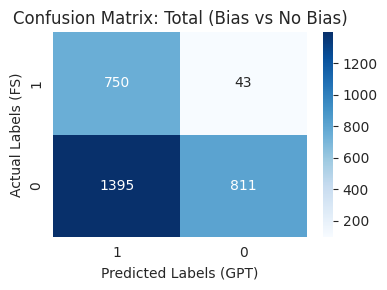

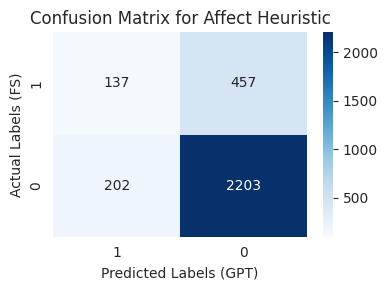

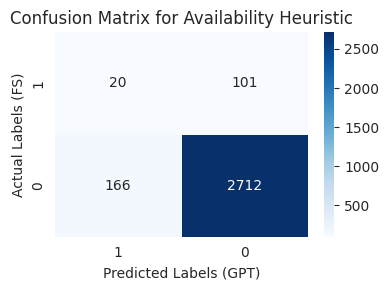

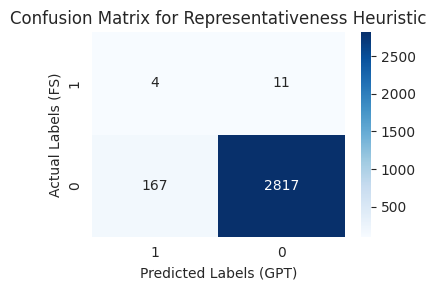

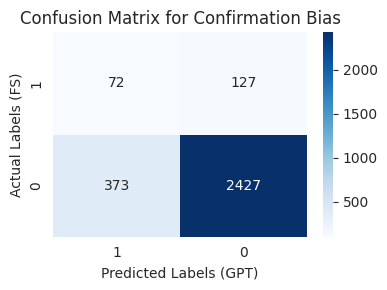

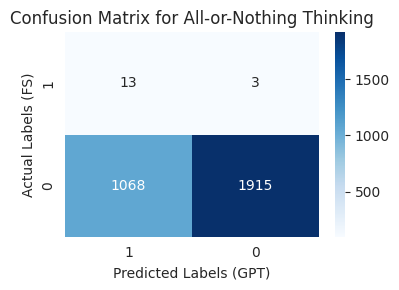

In [ ]:
# Function to plot confusion matrix
def plot_confusion(true, pred, title):
    cmatrix = confusion_matrix(true, pred, labels=[1, 0])
    plt.figure(figsize=(4,3))
    sns.heatmap(cmatrix, annot=True, fmt='d', cmap=cmap_full, vmin=100,
                xticklabels=['1','0'],
                yticklabels=['1','0'])
    plt.title(title)
    plt.ylabel('Actual Labels (FS)')
    plt.xlabel('Predicted Labels (GPT)')
    plt.tight_layout()
    plt.show()

# Plot Total confusion matrix
plot_confusion(bias_presence_df['fs_any'], bias_presence_df['gpt_any'], 'Confusion Matrix: Total (Bias vs No Bias)')

# Plot per-bias confusion matrices
pretty = {
    'affect_h': 'Affect Heuristic',
    'availability_h': 'Availability Heuristic',
    'representativeness_h': 'Representativeness Heuristic',
    'confirmation_b': 'Confirmation Bias',
    'all_or_nothing': 'All-or-Nothing Thinking'
}

for bias in biases:
    plot_confusion(
        bias_presence_df[f"{bias}_fs"],
        bias_presence_df[f"{bias}_gpt"],
        f'Confusion Matrix for {pretty[bias]}'
    )
